# **Yelp Review Classifier**

**Objective:** To classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

# Section 1: Data Wrangling & Feature Engg

**Basic Imports**

In [1]:
import numpy as np
import pandas as pd 

# visualistion libraries
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

**Reading the Json file**

In [2]:
df = pd.read_json('yelp_training_set_review.json', lines=True)

# lines=true used to fix the 'ValueError: Trailing data' error
# This error usually occurs when you attempt to import a JSON file into a pandas DataFrame, 
# yet the data is written in lines separated by endlines like ‘\n‘.

**Checking the head and other info of the data**

In [3]:
df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   votes        229907 non-null  object        
 1   user_id      229907 non-null  object        
 2   review_id    229907 non-null  object        
 3   stars        229907 non-null  int64         
 4   date         229907 non-null  datetime64[ns]
 5   text         229907 non-null  object        
 6   type         229907 non-null  object        
 7   business_id  229907 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 14.0+ MB


In [6]:
df.describe()

,stars
count,229907.000000
mean,3.766723
std,1.217010
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


**Making different columns for the kinds of votes**

In [9]:
# storing lambda functions into variables for a more readable code
funny = lambda f: f.get('funny')
useful = lambda u: u.get('useful')
cool = lambda c: c.get('cool')

# applying the lambda functions
df['funny']  = df['votes'].apply(funny)
df['useful']  = df['votes'].apply(useful)
df['cool']  = df['votes'].apply(cool)

#checking if it was done properly 
df.head()

,votes,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,0,1,0
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,0,2,1
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0


**We won't be needing the votes column anymore. So dropping it.**

In [10]:
#restoring the altered df for conviniecnce
df = df.drop('votes', axis = 1)

# check head 
df.head(2)

,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0


**Since we'll be analysing the content of the reviews, it makes sense to have a column indicating the length of the review**

In [11]:
df['text length'] = df['text'].apply(len)
df.head(2)

,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool,text length
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2,889
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0,1345


# Section 2: EDA

**Setting the view style**

In [57]:
sns.set_style('whitegrid')

**Checking the histograms of text lengths based off of the stars**

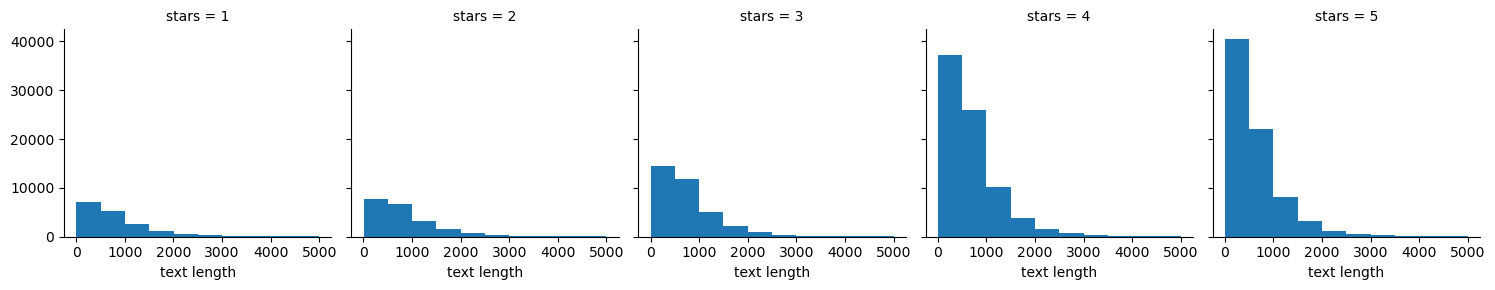

In [12]:
g = sns.FacetGrid(df, col = 'stars')
g.map(plt.hist,'text length')

**Creating a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

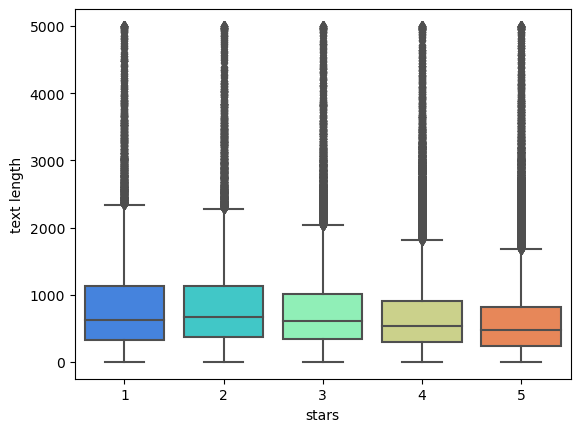

In [13]:
sns.boxplot(x = 'stars', y = 'text length', data = df, palette = 'rainbow')

**Create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

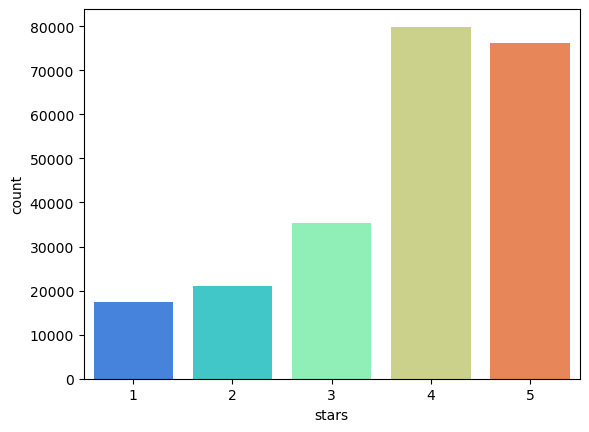

In [14]:
sns.countplot(x = 'stars', data = df, palette = 'rainbow')

**Creating a heatmap to see the correlation of the text length and the kinds of votes**

In [15]:
# first, we need to group the reviews by the no. of stars 
# we get the mean values for each columns as well

stars = df.groupby('stars').mean()
stars

,funny,useful,cool,text length
stars,,,,
1,0.930007,1.561258,0.543674,846.282770
2,0.892828,1.554182,0.728539,863.050341
3,0.765320,1.364873,0.851087,773.838532
4,0.677158,1.377075,0.963069,685.840106
5,0.584791,1.321092,0.889806,625.396099


In [153]:
# using .corr() to see the realtional dataframe
stars.corr()

,funny,useful,cool,text length
funny,1.000000,0.940279,-0.860878,0.983783
useful,0.940279,1.000000,-0.860840,0.901948
cool,-0.860878,-0.860840,1.000000,-0.788046
text length,0.983783,0.901948,-0.788046,1.000000


<AxesSubplot:>

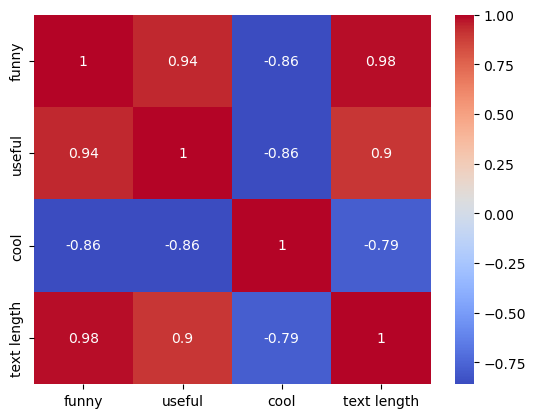

In [35]:
# visualising the above df using sns 

sns.heatmap(stars.corr(), cmap = 'coolwarm', annot = True)

# Section 3: Training

**Making all sklearn imports**

In [21]:
# Pipeline
from sklearn.pipeline import Pipeline

# Vectoriser 
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF 
from sklearn.feature_extraction.text import  TfidfTransformer

# Niaves Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

**Creating the pipeline**

In [22]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

**Defining x and y for training**

In [37]:
# Keeping only 1 or 5 star reviews 

df_class = df[(df.stars==1) | (df.stars==5)]

In [36]:
# for binary class
x = df_class['text']
y = df_class['stars']

**Making the train-test split**

In [32]:
# import 
from sklearn.model_selection import train_test_split

# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Fit the pipeline to the train df**

In [29]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

# Section 4: Predictions & Evaluations

**Predictions**

In [33]:
predictions = pipeline.predict(x_test)

**Evaluations**

In [34]:
# imports
from sklearn.metrics import confusion_matrix,classification_report

# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

print('\n')

# classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

Confusion Matrix:
[[  897  4412]
 [    9 22795]]


Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.17      0.29      5309
           5       0.84      1.00      0.91     22804

    accuracy                           0.84     28113
   macro avg       0.91      0.58      0.60     28113
weighted avg       0.87      0.84      0.79     28113

